In [3]:
from pathlib import Path

from cutqc2.core.cut_circuit import CutCircuit

(INFO) (base_tasks.py) (10-Sep-25 10:14:37) Pass: UnrollCustomDefinitions - 0.10896 (ms)
(INFO) (base_tasks.py) (10-Sep-25 10:14:37) Pass: BasisTranslator - 0.03839 (ms)


In [4]:
qasm_file = "../../../examples/scripts/supremacy_6qubit.qasm3"
with Path.open(qasm_file) as f:
    circuit_qasm3 = f.read()

In [7]:
cut_circuit = CutCircuit(circuit_qasm3=circuit_qasm3)
cut_circuit.cut(
    max_subcircuit_width=5,
    max_subcircuit_cuts=10,
    subcircuit_size_imbalance=2,
    max_cuts=10,
    num_subcircuits=[3],
)

cut_circuit.run_subcircuits()

(INFO) (cut_circuit.py) (10-Sep-25 10:17:44) Trying with 3 subcircuits
Set parameter Username
(INFO) (cutter.py) (10-Sep-25 10:17:44) Set parameter Username
Set parameter LicenseID to value 2646086
(INFO) (cutter.py) (10-Sep-25 10:17:44) Set parameter LicenseID to value 2646086
Academic license - for non-commercial use only - expires 2026-04-01
(INFO) (cutter.py) (10-Sep-25 10:17:44) Academic license - for non-commercial use only - expires 2026-04-01
(INFO) (cut_circuit.py) (10-Sep-25 10:17:44) Running subcircuit 0 on backend: statevector_simulator
(INFO) (cut_circuit.py) (10-Sep-25 10:17:44) Running subcircuit 1 on backend: statevector_simulator
(INFO) (cut_circuit.py) (10-Sep-25 10:17:44) Running subcircuit 2 on backend: statevector_simulator


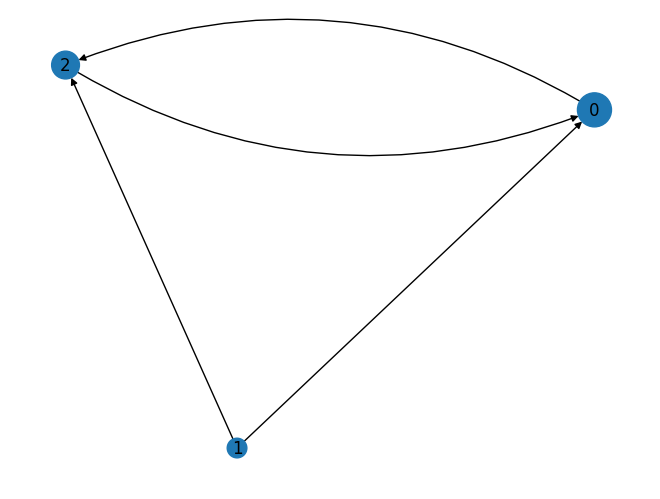

In [8]:
cut_circuit.compute_graph.draw()